<a href="https://colab.research.google.com/github/Roozbeh-Bazargani/CPSC540-project/blob/main/evaluation/CPSC540_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
root_path = 'drive/MyDrive/test_results'
test_labels = np.load(root_path+'/norm1ref_test_label_unbalanced_without_aug.npy')
pred_probs = np.load(root_path+'/norm1ref_test_pred_unbalanced_without_aug.npy')

In [20]:
print(test_labels.shape)
# Binarize the output
test_labels = label_binarize(test_labels, classes=[0, 1, 2, 3])
print(test_labels.shape)
test_labels[:20]

(797,)
(797, 4)


array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [21]:
print(pred_probs.shape)
pred_probs[:20]

(797, 4)


array([[5.7869198e-07, 3.1766781e-04, 9.9932694e-01, 3.5488626e-04],
       [2.4069479e-07, 8.3009142e-04, 9.7402602e-01, 2.5143648e-02],
       [2.6849264e-04, 1.3204205e-03, 9.9021167e-01, 8.1993854e-03],
       [9.6052332e-05, 1.1042291e-01, 8.8442683e-01, 5.0541982e-03],
       [2.1130475e-07, 4.6785031e-02, 9.5321453e-01, 2.4224613e-07],
       [1.6403008e-02, 8.8872945e-01, 9.4417684e-02, 4.4987118e-04],
       [4.2737634e-07, 1.0390547e-03, 9.9895048e-01, 1.0011444e-05],
       [9.6949461e-06, 1.8276058e-01, 8.1721950e-01, 1.0228847e-05],
       [6.4674904e-11, 8.1624773e-07, 9.9999917e-01, 2.1314448e-09],
       [6.1709152e-08, 1.1893232e-01, 8.8078862e-01, 2.7899083e-04],
       [5.2066925e-03, 9.3388927e-01, 6.0903136e-02, 8.5598668e-07],
       [9.9783903e-01, 3.4663593e-05, 1.8307274e-03, 2.9563357e-04],
       [5.0146963e-07, 3.7443042e-05, 9.9995732e-01, 4.8158327e-06],
       [2.8235411e-02, 1.4497847e-03, 9.6972936e-01, 5.8538828e-04],
       [8.0210511e-06, 3.8515558e-

In [22]:
n_classes = len(test_labels[0])
n_classes

4

# Classification Report

In [23]:
print("ROC for 4 classes:")

pred_labels = np.array([np.argmax(d) for d in pred_probs])
# Binarize the output
pred_labels = label_binarize(pred_labels, classes=[0, 1, 2, 3])
print(pred_labels.shape)
pred_labels[:30]
print(classification_report(test_labels, pred_labels))

ROC for 4 classes:
(797, 4)
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        59
           1       0.64      0.22      0.33       188
           2       0.61      0.85      0.71       411
           3       0.66      0.53      0.58       139

   micro avg       0.62      0.62      0.62       797
   macro avg       0.65      0.54      0.56       797
weighted avg       0.63      0.62      0.59       797
 samples avg       0.62      0.62      0.62       797



# ROC & AUC

In [24]:
roc_auc_score(test_labels, pred_probs, average ='macro', multi_class='ovr')

0.7990286351447805

In [25]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

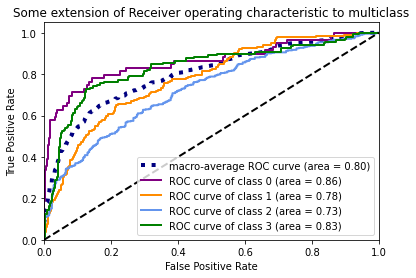

In [26]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = np.array(["purple", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()